In [34]:
import pandas as pd

df = pd.read_csv('poetry.csv')
print(df.shape)
df.head()

(581, 5)


,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


Text(0, 0.5, 'Anzahl Autoren')

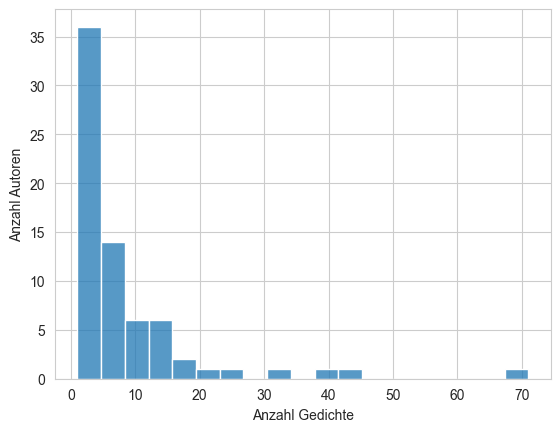

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df.groupby('author').size())
plt.xlabel('Anzahl Gedichte')
plt.ylabel('Anzahl Autoren')

In [36]:
df_years = pd.read_csv('author_years.csv')
df = df.merge(df_years, on='author')
df.head()

,author,content,poem name,age,type,birth,death,gender
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,1564,1616.0,Male
1,WILLIAM SHAKESPEARE,"Orpheus with his lute made trees, \r\nAnd the ...",Song: Orpheus with his lute made trees,Renaissance,Mythology & Folklore,1564,1616.0,Male
2,WILLIAM SHAKESPEARE,"What is your substance, whereof are you made,\...","Sonnet 53: What is your substance, whereof are...",Renaissance,Mythology & Folklore,1564,1616.0,Male
3,WILLIAM SHAKESPEARE,"Why didst thou promise such a beauteous day,\r...",Sonnet 34: Why didst thou promise such a beaut...,Renaissance,Nature,1564,1616.0,Male
4,WILLIAM SHAKESPEARE,"Where the bee sucks, there suck I:\r\nIn a cow...","Song: Where the bee sucks, there suck I",Renaissance,Nature,1564,1616.0,Male


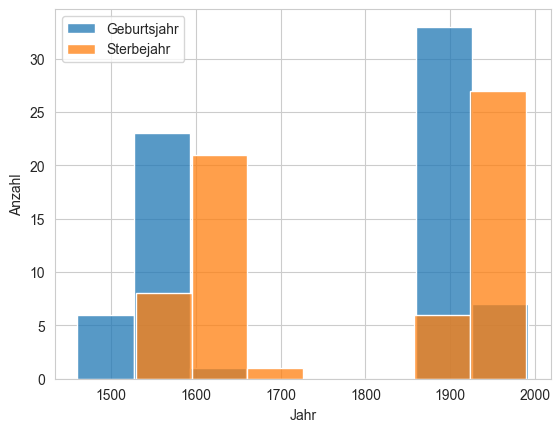

In [38]:
sns.histplot(df_years['birth'], label="Geburtsjahr")
sns.histplot(df_years['death'], label="Sterbejahr")
plt.legend()
plt.ylabel('Anzahl')
plt.xlabel('Jahr')
plt.show()

In [39]:
df["birth"].max()

1992

In [40]:
df["birth"].min()

1460

In [41]:
from lib import *
df["verse_count"] = df["content"].apply(verse_count)
df["punctuation_ratio"] = df["content"].apply(punctuation_ratio)
df["average_verse_length"] = df["content"].apply(average_verse_length)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]  # Remove stopwords and non-alphabetic words
    return ' '.join(tokens)

df["content_preprocessed"] = df["content"].apply(preprocess_text)


df["word_count"] = df["content_preprocessed"].apply(lambda x: len(word_tokenize(x)))
df["average_word_length"] = df["content_preprocessed"].apply(average_word_length)
df["noun_ratio"] = df["content_preprocessed"].apply(noun_ratio)
df["verb_ratio"] = df["content_preprocessed"].apply(verb_ratio)
df["adjective_ratio"] = df["content_preprocessed"].apply(adjective_ratio)
df["alliterations_ratio"] = df["content_preprocessed"].apply(alliterations_ratio)

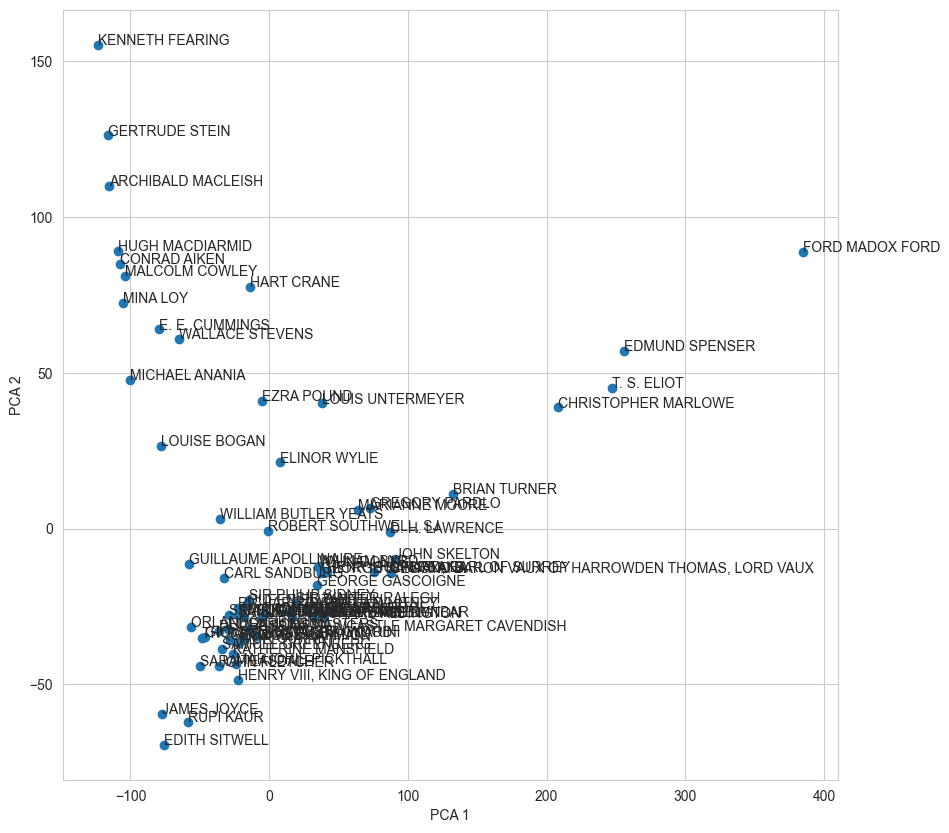

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
grouped_df = df.groupby("author")[['verse_count', "punctuation_ratio", "word_count", "average_word_length", "noun_ratio", "adjective_ratio", "verb_ratio", "alliterations_ratio", "average_verse_length"]].mean()
author_matrix_reduced = pca.fit_transform(df.groupby("author")[['verse_count', "punctuation_ratio", "word_count", "average_word_length", "noun_ratio", "adjective_ratio", "verb_ratio", "alliterations_ratio", "average_verse_length"]].mean())

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(author_matrix_reduced[:, 0], author_matrix_reduced[:, 1])

for i, txt in enumerate(grouped_df.index):
    ax.annotate(txt, (author_matrix_reduced[i, 0], author_matrix_reduced[i, 1]))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [73]:
df.to_csv('poetry_features.csv', index=False)

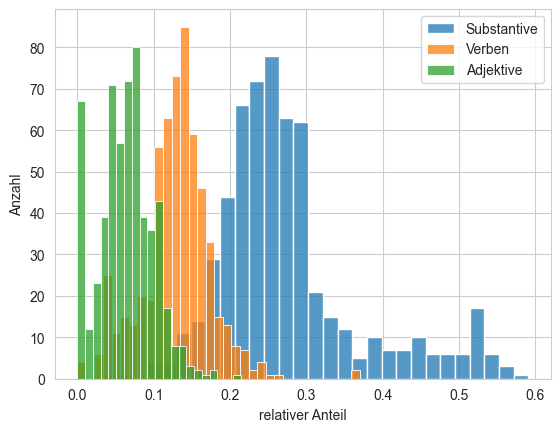

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["content"].apply(noun_ratio), label="Substantive")
sns.histplot(df["content"].apply(verb_ratio), label="Verben")
sns.histplot(df["content"].apply(adjective_ratio), label="Adjektive")

plt.legend()
plt.xlabel('relativer Anteil')
plt.ylabel('Anzahl')
plt.show()

<Axes: xlabel='punctuation_ratio', ylabel='Count'>

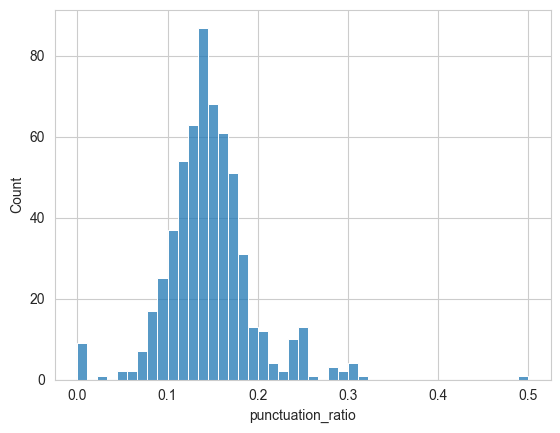

In [44]:
sns.histplot(df["punctuation_ratio"])

In [45]:
df['author'].value_counts().mean()

8.3

In [46]:
from nltk import word_tokenize

df['content'].apply(lambda x: len(word_tokenize(x))).mean()

210.60585197934594

In [47]:
df['content_preprocessed']

0      let bird loudest lay sole arabian tree herald ...
1      orpheus lute made trees mountain tops freeze b...
2      substance whereof made millions strange shadow...
3      didst thou promise beauteous day make travel f...
4      bee sucks suck cowslips bell lie couch owls cr...
                             ...                        
576    want get degree let tell society tell increase...
577    pretend grief goes away mum said never really ...
578    begins simply fist tight glossy sweat two eyes...
579    rain story series voices birds maybe character...
580    curve hip lay head thinking fingers gone slow ...
Name: content_preprocessed, Length: 581, dtype: object

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

author_vectors = df.groupby('author')[['verse_count', "punctuation_ratio", "word_count", "average_word_length", "noun_ratio", "adjective_ratio", "alliterations_ratio"]].mean()
author_matrix = np.vstack(author_vectors.values)

similarity_matrix = cosine_similarity(author_matrix)

authors = author_vectors.index
similarity_df = pd.DataFrame(similarity_matrix, index=authors, columns=authors)

C:\Users\Felix\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


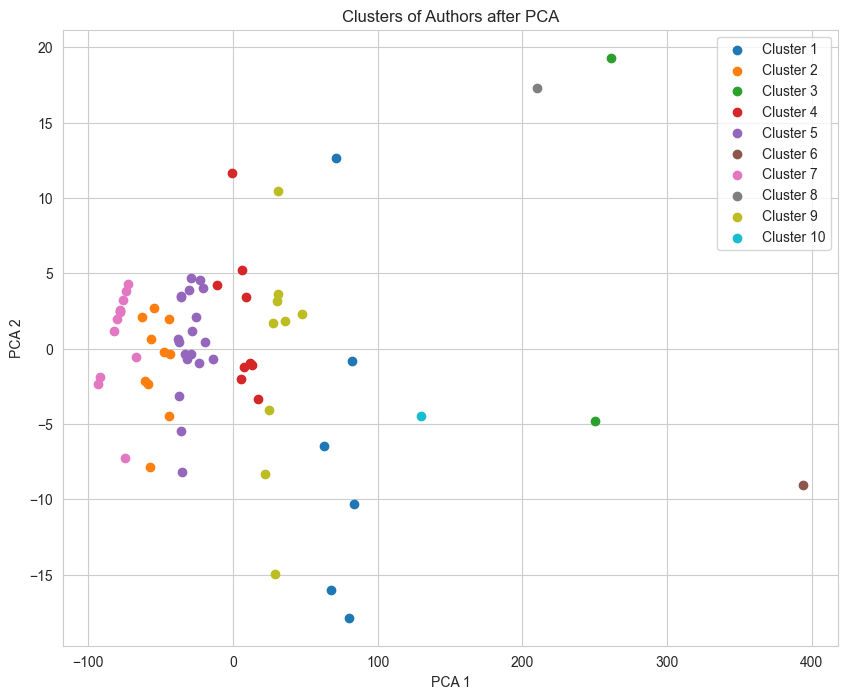

In [49]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
author_matrix_reduced = pca.fit_transform(author_matrix)

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(author_matrix_reduced)

plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    points = author_matrix_reduced[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')

plt.title('Clusters of Authors after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [50]:
df["gender"].value_counts(normalize=True)

gender
Male      0.874355
Female    0.125645
Name: proportion, dtype: float64

In [51]:
df["age"].value_counts(normalize=True)

age
Renaissance    0.560498
Modern         0.439502
Name: proportion, dtype: float64

In [52]:
df['birth'].min()

1460